# **Machine Translation Using Attention:**

# English to Hindi Translation: 

## **Data Preparation:**

## **Import all libraries:**

In [1]:
import numpy as np 

import pandas as pd
from sklearn.model_selection import train_test_split

import os
import tensorflow as tf

import time
import re
import string

from tqdm import tqdm

# Data Preprocessing:

In [2]:
file=open('../input/hindi-english-sentence-pairs/hin.txt')

In [3]:
ascii = set(string.printable)   

def seperate_eng_and_hin(s):
    for i in range(len(s)):
        if s[i] not in ascii:
            return s[:i],s[i:]

In [4]:
c=0
english_sentences=[]
hindi_sentences=[]
for i in tqdm(file):
    match = re.search('CC-BY 2.0', i).start() 
    en,hin=seperate_eng_and_hin(i[:match])
    english_sentences.append(en)
    hindi_sentences.append(hin)
    

2774it [00:00, 34801.46it/s]


In [5]:
english_sentences[20:30],hindi_sentences[20:30]

(['Have fun.\t',
  'Have fun.\t',
  'Have fun.\t',
  'I forgot.\t',
  'I forgot.\t',
  "I'll pay.\t",
  "I'm fine.\t",
  "I'm full.\t",
  "Let's go!\t",
  'Answer me.\t'],
 ['मज़े करना।\t',
  'मौज करना।\t',
  'मज़े करो।\t',
  'मैं भूल गया।\t',
  'मैं भूल गई।\t',
  'मैं पैसे दूंगा।\t',
  'मैं ठीक हूँ।\t',
  'मेरा पेट भर गया है।\t',
  'चलो चलें!\t',
  'मुझे जवाब दो।\t'])

In [6]:
data=pd.DataFrame()

data['english_sentence']=english_sentences
data['hindi_sentence']=hindi_sentences

In [7]:
data.head()

,english_sentence,hindi_sentence
0,Wow!\t,वाह!\t
1,Help!\t,बचाओ!\t
2,Jump.\t,उछलो.\t
3,Jump.\t,कूदो.\t
4,Jump.\t,छलांग.\t


In [8]:
data.describe()

,english_sentence,hindi_sentence
count,2774,2774
unique,2572,2697
top,Is your father a teacher?\t,उसे सब पसंद करते हैं।\t
freq,9,4


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   english_sentence  2774 non-null   object
 1   hindi_sentence    2774 non-null   object
dtypes: object(2)
memory usage: 43.5+ KB


In [10]:
data=data.dropna()
print(data.shape)

(2774, 2)


In [11]:
n=int(input())

en=data['english_sentence'].values[n]

hi=data['hindi_sentence'].values[n]

print(en)

print(hi)

45
Wonderful!	
अद्भुत	


#  Cleaning The Data:

In [12]:
import string

sc = list(set(string.punctuation))

In [13]:
data['english_sentence']=data['english_sentence'].apply(lambda x: x.lower())

In [14]:
data.columns

Index(['english_sentence', 'hindi_sentence'], dtype='object')

In [15]:
#replace /t wit space in every sentence
data['english_sentence']=data['english_sentence'].apply(lambda x: x.replace('\t',' '))
data['hindi_sentence']=data['hindi_sentence'].apply(lambda x: x.replace('\t',' '))

In [16]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [17]:
data['english_sentence']=data['english_sentence'].apply(lambda x: decontracted(x))

In [18]:
#remove special characters from sentences
data['english_sentence']=data['english_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in sc))
data['hindi_sentence']=data['hindi_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in sc))

In [19]:
#remove digits from sentences
data['english_sentence']=data['english_sentence'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
data['hindi_sentence']=data['hindi_sentence'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))

In [20]:
#adding <start> and <end> to sentences
data['english_sentence']=data['english_sentence'].apply(lambda x: '<start> '+x+' <end>')
data['hindi_sentence']=data['hindi_sentence'].apply(lambda x: '<start> '+x+' <end>')

In [21]:
#finding lengths of each sentences
data['length_eng_sentence']=data['english_sentence'].apply(lambda x:len(x.split(" ")))
data['length_hin_sentence']=data['hindi_sentence'].apply(lambda x:len(x.split(" ")))

In [22]:
data.head()

,english_sentence,hindi_sentence,length_eng_sentence,length_hin_sentence
0,<start> wow <end>,<start> वाह <end>,4,4
1,<start> help <end>,<start> बचाओ <end>,4,4
2,<start> jump <end>,<start> उछलो <end>,4,4
3,<start> jump <end>,<start> कूदो <end>,4,4
4,<start> jump <end>,<start> छलांग <end>,4,4


# Fliter the values based upon length of sentences:

In [23]:
data.columns

Index(['english_sentence', 'hindi_sentence', 'length_eng_sentence',
       'length_hin_sentence'],
      dtype='object')

In [24]:
english_sen_lengths=data['length_eng_sentence'].values
hindi_sen_lengths=data['length_hin_sentence'].values

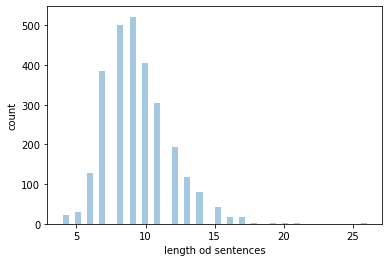

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.distplot(english_sen_lengths,kde=False)
plt.xlabel('length od sentences')
plt.ylabel('count')
plt.show();

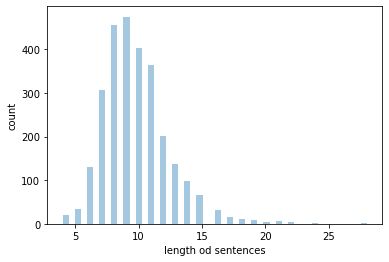

In [26]:
sns.distplot(hindi_sen_lengths,kde=False)
plt.xlabel('length od sentences')
plt.ylabel('count')
plt.show();

In [27]:
print('maximum length of english sentences :'+str(max(english_sen_lengths)))
print('maximum length of hindi sentences :' + str(max(hindi_sen_lengths)))

maximum length of english sentences :26
maximum length of hindi sentences :28


In [28]:
data=data[data['length_eng_sentence']<=25]
data=data[data['length_hin_sentence']<=25]

In [29]:
data.shape

(2773, 4)

In [30]:
n=int(input())

en=data['english_sentence'].values[n]

hi=data['hindi_sentence'].values[n]

print(en)

print(hi)

45
<start> wonderful  <end>
<start> अद्भुत  <end>


# Preprocessing the Data

* combine all words
* sort the words based upon frequency 
* assign the ranks of the words based upon frequency
* convert the text sentence into list of tokens
* padding the token's list

In [31]:
from collections import Counter 
def tokenize(lang):
    words=[]
    for i in lang:
        words.extend(i.split())
    s=Counter(words)
    a=list(s.keys())
    b=list(s.values())
    ind=np.argsort(np.array(b))
    word_to_ind={}
    for i in range(len(ind)):
        word_to_ind[a[ind[-(i+1)]]]=i+1
    sequences=[]
    for i in lang:
        sen=[]
        for j in i.split():
            sen.append(word_to_ind[j])
        sequences.append(sen)
    pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences,padding='post',maxlen=25)
    
    return word_to_ind,pad_sequences
    

In [32]:
en_word_to_ind,en_sequences=tokenize(data['english_sentence'].values)
hin_word_to_ind,hin_sequences=tokenize(data['hindi_sentence'].values)

In [37]:
print('english vocabulary size : '+str(len(en_word_to_ind)))
print('hindi vocabulary size : '+str(len(hin_word_to_ind)))

english vocabulary size : 2296
hindi vocabulary size : 2965


In [38]:
en_sequences.shape,hin_sequences.shape

((2773, 25), (2773, 25))

In [39]:
en_sequences[0].shape

(25,)

# Split The data into train and validation:

In [40]:
x_train, x_val, y_train, y_val = train_test_split(en_sequences,hin_sequences, test_size=0.1)


print(len(x_train), len(y_train), len(x_val), len(y_val))

2495 2495 278 278


# shuffle data and use Data Generators:

In [41]:
BUFFER_SIZE = len(x_train)
BATCH_SIZE = 64
steps_per_epoch = len(x_train)//BATCH_SIZE
embedding_dim = 256
units = 512
vocab_inp_size = len(en_word_to_ind)+1
vocab_tar_size = len(hin_word_to_ind)+1

dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

# Attention MOdel:

# Enoder of Attention Model:

In [42]:
class Encoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

    def call(self, x, hidden):
        x = self.embedding(x)
        output, state = self.gru(x, initial_state = hidden)
        return output, state

    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.enc_units))

In [43]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)


# Attention Layer

In [44]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, query, values):

        query_with_time_axis = tf.expand_dims(query, 1)

        score = self.V(tf.nn.tanh(self.W1(query_with_time_axis) + self.W2(values)))


        attention_weights = tf.nn.softmax(score, axis=1)

        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

# Decoder of Attention Model:

In [45]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
        self.fc = tf.keras.layers.Dense(vocab_size)

        self.attention = BahdanauAttention(self.dec_units)

    def call(self, x, hidden, enc_output):
        context_vector, attention_weights = self.attention(hidden, enc_output)

        x = self.embedding(x)

        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

        output, state = self.gru(x)

        
        output = tf.reshape(output, (-1, output.shape[2]))

        x = self.fc(output)

        return x, state, attention_weights

In [46]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)


# Define Optimizer and Loss Function:

In [47]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

# Define checkpoint to store the Model:

In [48]:
checkpoint_dir = '/kaggle/working/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

# Training the Model:

In [49]:
@tf.function
def train_step(inp, targ, enc_hidden):
    loss = 0

    with tf.GradientTape() as tape:
        enc_output, enc_hidden = encoder(inp, enc_hidden)

        dec_hidden = enc_hidden

        dec_input = tf.expand_dims([hin_word_to_ind['<start>']] * BATCH_SIZE, 1)

        for t in range(1, targ.shape[1]):
           
            predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

            loss += loss_function(targ[:, t], predictions)

            dec_input = tf.expand_dims(targ[:, t], 1)

    batch_loss = (loss / int(targ.shape[1]))

    variables = encoder.trainable_variables + decoder.trainable_variables

    gradients = tape.gradient(loss, variables)

    optimizer.apply_gradients(zip(gradients, variables))

    return batch_loss

In [52]:
EPOCHS = 10

for epoch in range(EPOCHS):
    start = time.time()

    enc_hidden = encoder.initialize_hidden_state()
    total_loss = 0

    for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
        batch_loss = train_step(inp, targ, enc_hidden)
        total_loss += batch_loss

        if batch % 10 == 0:
            print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,batch,batch_loss.numpy()))

    if (epoch + 1) % 10 == 0:
        checkpoint.save(file_prefix = checkpoint_prefix)

    print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 0.4893
Epoch 1 Batch 10 Loss 0.5146
Epoch 1 Batch 20 Loss 0.5654
Epoch 1 Batch 30 Loss 0.5243
Epoch 1 Loss 0.5164
Time taken for 1 epoch 3.1334402561187744 sec

Epoch 2 Batch 0 Loss 0.4662
Epoch 2 Batch 10 Loss 0.4633
Epoch 2 Batch 20 Loss 0.4793
Epoch 2 Batch 30 Loss 0.5003
Epoch 2 Loss 0.4670
Time taken for 1 epoch 2.9973957538604736 sec

Epoch 3 Batch 0 Loss 0.3999
Epoch 3 Batch 10 Loss 0.4517
Epoch 3 Batch 20 Loss 0.3948
Epoch 3 Batch 30 Loss 0.4371
Epoch 3 Loss 0.4222
Time taken for 1 epoch 3.111346960067749 sec

Epoch 4 Batch 0 Loss 0.4089
Epoch 4 Batch 10 Loss 0.3573
Epoch 4 Batch 20 Loss 0.3450
Epoch 4 Batch 30 Loss 0.3539
Epoch 4 Loss 0.3788
Time taken for 1 epoch 3.032662868499756 sec

Epoch 5 Batch 0 Loss 0.3370
Epoch 5 Batch 10 Loss 0.3105
Epoch 5 Batch 20 Loss 0.3913
Epoch 5 Batch 30 Loss 0.4204
Epoch 5 Loss 0.3506
Time taken for 1 epoch 3.072936534881592 sec

Epoch 6 Batch 0 Loss 0.2958
Epoch 6 Batch 10 Loss 0.3280
Epoch 6 Batch 20 Loss 0.2927
Epoch 6

# Prediction Of the Model:

In [53]:
hin_ind_to_word={}

for i in hin_word_to_ind:
    hin_ind_to_word[hin_word_to_ind[i]]=i
    
en_ind_to_word={}

for i in en_word_to_ind:
    en_ind_to_word[en_word_to_ind[i]]=i

In [54]:
def preprocess_sentence(sentence):
    x=sentence.lower()
    x=''.join(ch for ch in x if ch not in sc)
    x=''.join([i for i in x if not i.isdigit()])
    x='<start> '+x+' <end>'
    return x

In [56]:
def evaluate(sentence):

    sentence = preprocess_sentence(sentence)
   
    inputs = [en_word_to_ind[i] for i in sentence.split(' ')]
    inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs], maxlen=25,padding='post')
    inputs = tf.convert_to_tensor(inputs)

    result = ''

    hidden = [tf.zeros((1, 512))]
    enc_out, enc_hidden = encoder(inputs, hidden)

    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([hin_word_to_ind['<start>']], 0)

    for t in range(25):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                         dec_hidden,
                                                         enc_out)
        attention_weights = tf.reshape(attention_weights, (-1, ))
        

        predicted_id = tf.argmax(predictions[0]).numpy()

        

        if hin_ind_to_word[predicted_id] == '<end>':
            return result, sentence
        result += hin_ind_to_word[predicted_id] + ' '

        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence

In [58]:
for i in range(5):
    k=int(input())
    sentence=''
    for j in range(1,len(x_val[k])-1):
        if  x_val[k][j+1]==0:
            continue
        sentence+=en_ind_to_word[x_val[k][j]]+' '
    
    pred,x=evaluate(sentence.strip())
    actual=''
    for j in range(1,len(y_val[k])-1):
        if  x_val[k][j+1]==0:
            continue
        
        actual+=' '+hin_ind_to_word[y_val[k][j]]
    x=' '.join([j for j in x.split()[1:-1]])       
    print("english sentence---> "+x)
    print('\n')
    print('predicted sentence--->'+pred)
    print('\n')
    print('actual sentence-->'+actual)
    print('\n')
    print('--------------------------------------')

45
english sentence---> i am wondering whether to take on that job


predicted sentence--->मैं गाड़ी चला सकता हूँ। 


actual sentence--> मैं सोच रहा हूँ कि नौकरी लूँ या नहीं


--------------------------------------
86
english sentence---> the room smelled of tobacco


predicted sentence--->हम सब बहुत सारी बातें हैं। 


actual sentence--> कमरे में तम्बाकू की महक


--------------------------------------
98
english sentence---> it is not raining much this year


predicted sentence--->यह तो आज कोई नहीं है। 


actual sentence--> इस साल ज़्यादा बारिश नहीं हो रही


--------------------------------------
5
english sentence---> he will get well soon


predicted sentence--->वह तीन बजे से आता है। 


actual sentence--> वह जल्द ही ठीक हो


--------------------------------------
8
english sentence---> we are anxious for world peace


predicted sentence--->हम अच्छे से हँस पड़ी। 


actual sentence--> हम विश्व शांति के लिए तत्पर


--------------------------------------
